## Imports, Data Preprocessing

In [168]:
import os
from databricks import sql
import pandas as pd
import seaborn as sns
import numpy as np

In [169]:
df = pd.DataFrame(columns={'rank', 'company', 'revenues', 'revenue_perc_change', 'profits', 'profits_perc_change', 'assets', 'market_value', 'change_in_rank', 'employees'})
with sql.connect(
        server_hostname=os.getenv("DATABRICKS_SERVER_HOSTNAME"),
        http_path=os.getenv("DATABRICKS_HTTP_PATH"),
        access_token=os.getenv("DATABRICKS_TOKEN"),
    ) as connection:

        with connection.cursor() as cursor:
            cursor.execute("SELECT * FROM default.fortune_1000")
            result = cursor.fetchall()

            result = pd.Series(result)
            print(result[0])
            df = df.append(result, ignore_index=True)

Row(rank=1, name='Walmart', revenues='$572,754 ', revenue_percent_change='2.40%', profits='$13,673 ', profits_percent_change='1.20%', assets='$244,860 ', market_value='$409,795 ', change_in_rank='-', employees='2,300,000')


/tmp/ipykernel_4961/2175722142.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)


In [170]:
df = df.T[10:]
df.rename(columns={0: 'record'}, inplace=True)

In [171]:
df[['rank', 
'company', 
'revenues', 
'revenue_perc_change', 
'profits', 
'profits_perc_change', 
'assets', 
'market_value', 
'change_in_rank', 
'employees']] = pd.DataFrame(df['record'].tolist(), index= df.index)

In [172]:
df.drop(columns={'record', 'employees', 'change_in_rank'}, inplace=True)

In [173]:
df['revenues'] = df['revenues'].apply(lambda x: x[1:])
df['revenues'] = df['revenues'].apply(lambda x: x.replace(',',''))
df['revenues'] = df['revenues'].apply(lambda x: float(x))

df['profits'] = df['profits'].apply(lambda x: x.replace('$',''))
df['profits'] = df['profits'].apply(lambda x: x.replace('(',''))
df['profits'] = df['profits'].apply(lambda x: x.replace(')',''))
df['profits'] = df['profits'].apply(lambda x: x.replace('-','0'))
df['profits'] = df['profits'].apply(lambda x: x.replace(',',''))
df['profits'] = df['profits'].apply(lambda x: float(x))

df['assets'] = df['assets'].apply(lambda x: x.replace('$',''))
df['assets'] = df['assets'].apply(lambda x: x.replace('(',''))
df['assets'] = df['assets'].apply(lambda x: x.replace(')',''))
df['assets'] = df['assets'].apply(lambda x: x.replace(',',''))
df['assets'] = df['assets'].apply(lambda x: float(x))

df['market_value'] = df['market_value'].apply(lambda x: x.replace('-','0'))
df['market_value'] = df['market_value'].apply(lambda x: x.replace('$',''))
df['market_value'] = df['market_value'].apply(lambda x: x.replace('(',''))
df['market_value'] = df['market_value'].apply(lambda x: x.replace(')',''))
df['market_value'] = df['market_value'].apply(lambda x: x.replace(',',''))
df['market_value'] = df['market_value'].apply(lambda x: float(x))

In [174]:
df.head()

,rank,company,revenues,revenue_perc_change,profits,profits_perc_change,assets,market_value
0,1,Walmart,572754.0,2.40%,13673.0,1.20%,244860.0,409795.0
1,2,Amazon,469822.0,21.70%,33364.0,56.40%,420549.0,1658807.3
2,3,Apple,365817.0,33.30%,94680.0,64.90%,351002.0,2849537.6
3,4,CVS Health,292111.0,8.70%,7910.0,10.20%,232999.0,132839.2
4,5,UnitedHealth Group,287597.0,11.80%,17285.0,12.20%,212206.0,479830.3


## EDA

In [175]:
# check duplicated values

df.duplicated().sum()


0

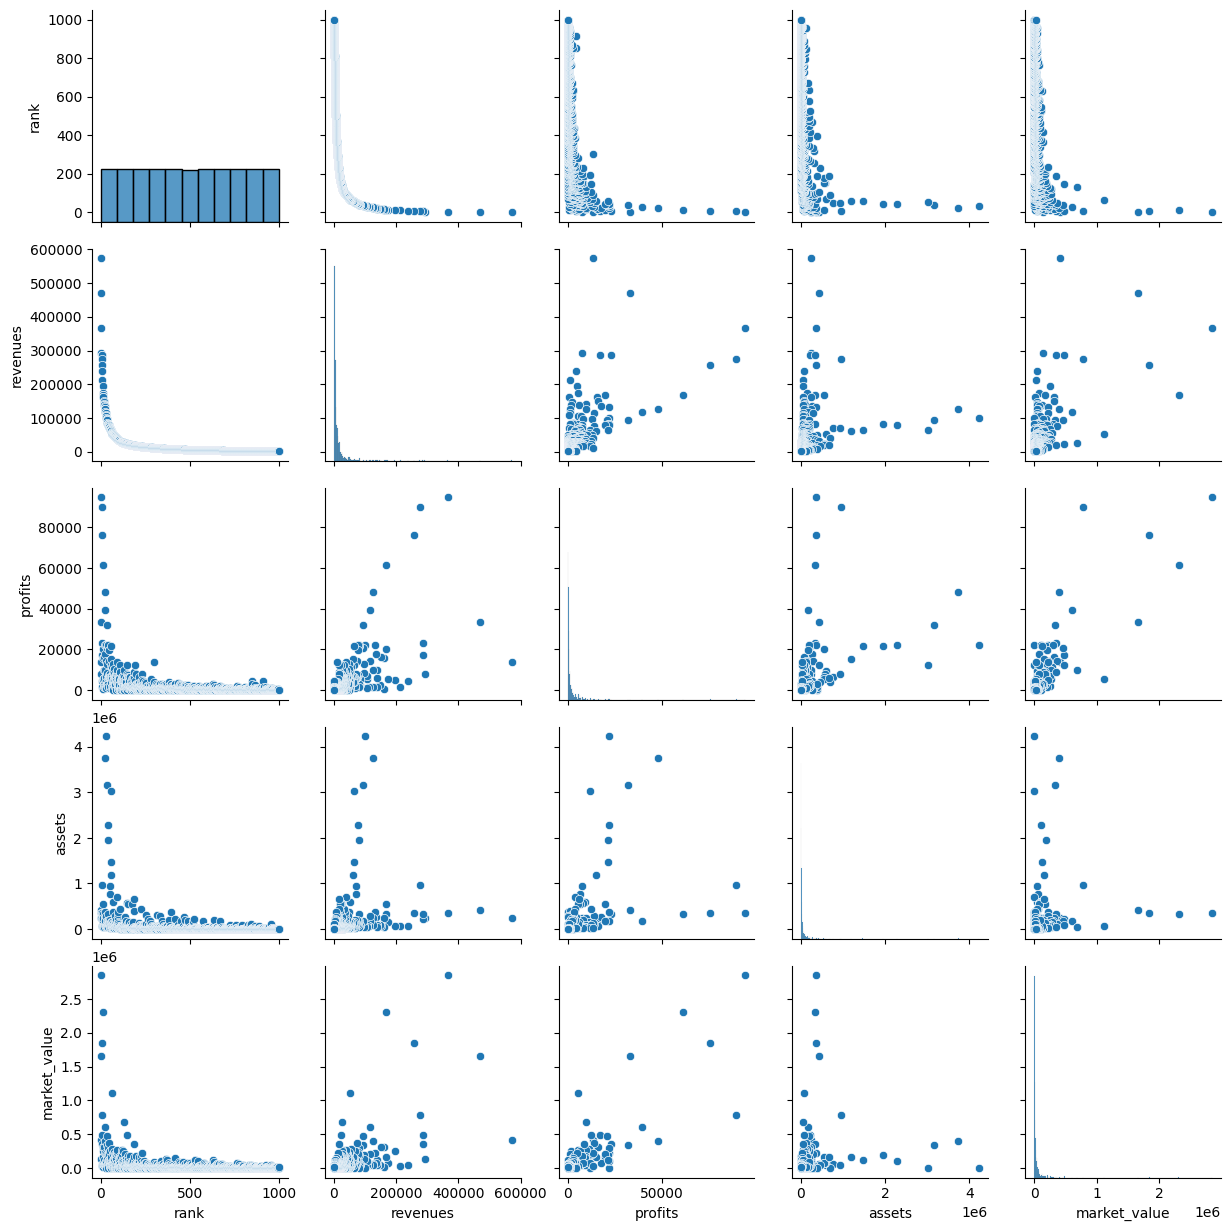

In [176]:
# sns pairplot

sns.pairplot(df)

In [177]:
# count null values

df.isnull().sum()


rank                   0
company                0
revenues               0
revenue_perc_change    0
profits                0
profits_perc_change    0
assets                 0
market_value           0
dtype: int64

<AxesSubplot: >

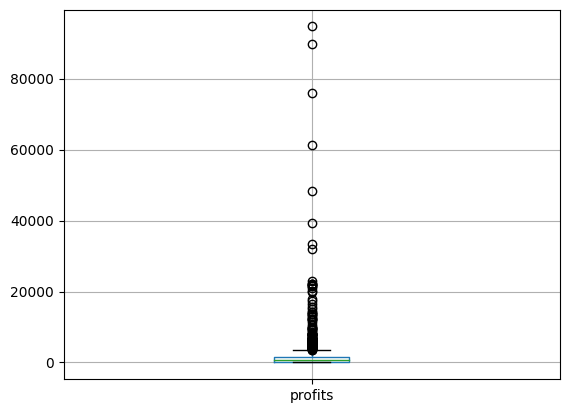

In [178]:
# some quick boxplots

df[['profits']].boxplot()


<AxesSubplot: >

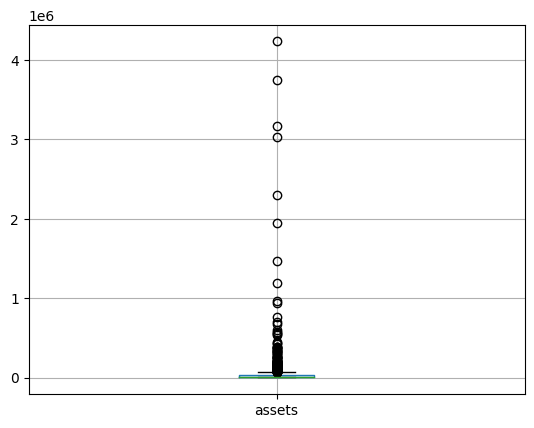

In [179]:
df[['assets']].boxplot()


<AxesSubplot: >

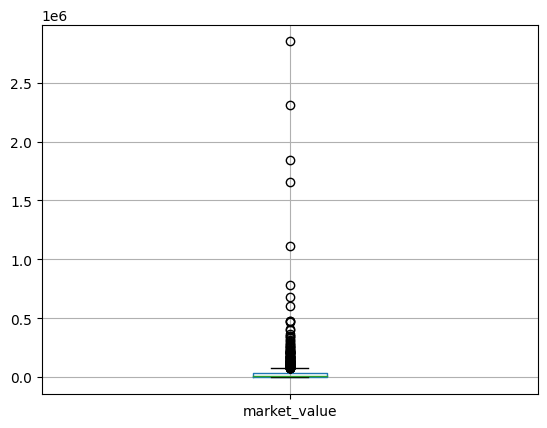

In [180]:
df[['market_value']].boxplot()


<AxesSubplot: >

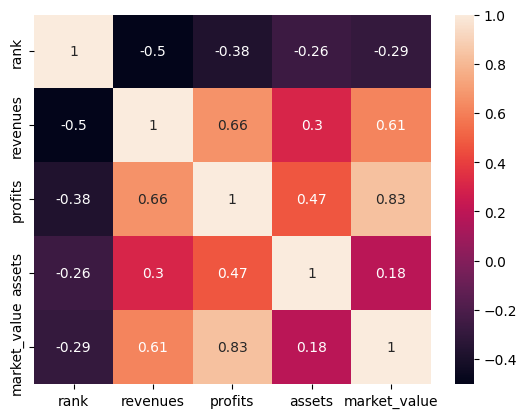

In [181]:
# heatmap

sns.heatmap(df.corr(), annot=True)